Import Library
***

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


Import Dataset
***

In [2]:
# Load data
data=pd.read_csv('cleaned_star_data.csv')

# Show data
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         239 non-null    object 
 1   Luminosity(L/Lo)        239 non-null    object 
 2   Radius(R/Ro)            239 non-null    object 
 3   Absolute magnitude(Mv)  239 non-null    object 
 4   Star type               239 non-null    float64
 5   Star color              239 non-null    object 
 6   Spectral Class          239 non-null    object 
dtypes: float64(1), object(6)
memory usage: 13.2+ KB


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3042,0.0005,0.1542,16.6,0.0,Red,M
2,2600,0.0003,0.102,18.7,0.0,Red,M
3,2800,0.0002,,16.65,0.0,Red,M
4,1939,0.000138,0.103,20.06,0.0,Red,M


Drop Null
*******

In [3]:
print("====== Before Drop Null ======")
for col in data.columns:
    null_replace = data[col].replace(" ",None)
    data[col] = null_replace

data.isna().sum()

print(data.isna().sum())
# data = data.dropna()

data = data.dropna()
print("")
print("====== After Drop Null ======")
print(data.isna().sum())

====== Before Drop Null ======
Temperature (K)           3
Luminosity(L/Lo)          7
Radius(R/Ro)              8
Absolute magnitude(Mv)    6
Star type                 1
Star color                7
Spectral Class            3
dtype: int64

====== After Drop Null ======
Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64


Data Transformation : Encoding String Feature 
******

In [4]:
# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
encode_list = ["Star color", "Spectral Class"]

for col in data.columns:
    if col in (encode_list):
        data[col]=le.fit_transform(data[col])
        print("Encoding " + col + " ==>" + " integer")

data.head()

Encoding Star color ==> integer
Encoding Spectral Class ==> integer


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
1,3042,0.0005,0.1542,16.6,0.0,2,5
2,2600,0.0003,0.102,18.7,0.0,2,5
4,1939,0.000138,0.103,20.06,0.0,2,5
6,2637,0.00073,0.127,17.22,0.0,2,5
7,2600,0.0004,0.096,17.4,0.0,2,5


Change Column Datatype
***

In [5]:
print("======= Before =======")
print(data.info())

======= Before =======
<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 1 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         215 non-null    object 
 1   Luminosity(L/Lo)        215 non-null    object 
 2   Radius(R/Ro)            215 non-null    object 
 3   Absolute magnitude(Mv)  215 non-null    object 
 4   Star type               215 non-null    float64
 5   Star color              215 non-null    int32  
 6   Spectral Class          215 non-null    int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 11.8+ KB
None


In [6]:
float_dtype_col = ["Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)"]
int_dtype_col = ["Temperature (K)", "Star type"]

data[float_dtype_col] = data[float_dtype_col].astype(float)
data[int_dtype_col] = data[int_dtype_col].astype(int)


print("======= After =======")
print(data.info())

======= After =======
<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 1 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         215 non-null    int32  
 1   Luminosity(L/Lo)        215 non-null    float64
 2   Radius(R/Ro)            215 non-null    float64
 3   Absolute magnitude(Mv)  215 non-null    float64
 4   Star type               215 non-null    int32  
 5   Star color              215 non-null    int32  
 6   Spectral Class          215 non-null    int32  
dtypes: float64(3), int32(4)
memory usage: 10.1 KB
None


Feature Extraction
***

In [7]:
X = data.drop(["Star type"],axis=1)   #Feature Matrix
Y = data["Star type"]          #Target Variable

Test, Train Split
***

In [8]:
# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)  # 70% training and 30% test

Feature Nomalization
********

In [9]:
X_train_normalized = preprocessing.normalize(X_train,norm="l2" ,axis=0)
X_test_normalized = preprocessing.normalize(X_test,norm="l2" ,axis=0)


Target Distributions
***

Text(0, 0.5, 'count')

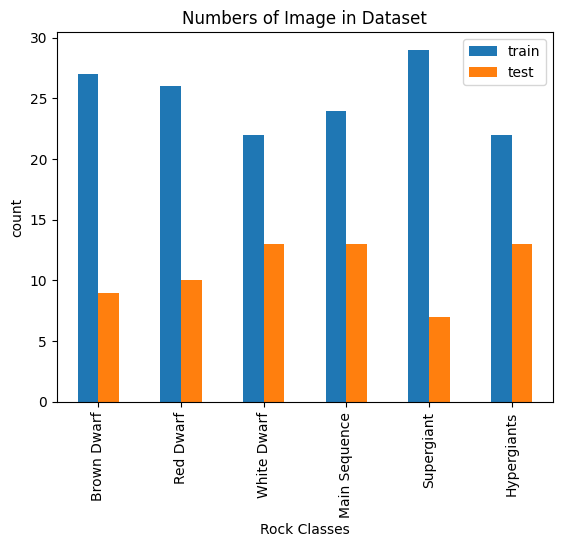

In [10]:
classes = ["Brown Dwarf", "Red Dwarf", "White Dwarf", "Main Sequence", "Supergiant", "Hypergiants"]

train_count = {}
test_count = {}

for c in range(0,len(classes)):
    train_count[classes[c]] = list(Y_train).count(c)
    test_count[classes[c]] = list(Y_test).count(c)

graph = pd.DataFrame({
    "train": train_count,
    "test": test_count,
    },
    index = classes
)

graph.plot(kind="bar")
plt.title("Numbers of Image in Dataset")
plt.xlabel("Rock Classes")
plt.ylabel("count")

Train Model
***

In [11]:
# Create model object
clf = MLPClassifier(hidden_layer_sizes=(16,24,29,12), # - 16,24,32,27,12  - 16,24,29,12
                    random_state=6,
                    verbose=True,
                    solver='adam', #default
                    activation='relu', #defualt rectified linear unit function
                    learning_rate_init=0.029, 
                    n_iter_no_change=10,
                    max_iter=300
                    )
clf.fit(X_train_normalized,Y_train)

Iteration 1, loss = 1.83501281
Iteration 2, loss = 1.79943267
Iteration 3, loss = 1.78969582
Iteration 4, loss = 1.77731931
Iteration 5, loss = 1.76400593
Iteration 6, loss = 1.74817171
Iteration 7, loss = 1.72871394
Iteration 8, loss = 1.69251351
Iteration 9, loss = 1.65291018
Iteration 10, loss = 1.60770537
Iteration 11, loss = 1.55638568
Iteration 12, loss = 1.50316090
Iteration 13, loss = 1.45324478
Iteration 14, loss = 1.42795182
Iteration 15, loss = 1.35551555
Iteration 16, loss = 1.30572597
Iteration 17, loss = 1.27829443
Iteration 18, loss = 1.21433855
Iteration 19, loss = 1.22909425
Iteration 20, loss = 1.15331477
Iteration 21, loss = 1.16698277
Iteration 22, loss = 1.08467768
Iteration 23, loss = 1.10132802
Iteration 24, loss = 1.02424824
Iteration 25, loss = 1.03554903
Iteration 26, loss = 0.97466127
Iteration 27, loss = 0.96293884
Iteration 28, loss = 0.89330733
Iteration 29, loss = 0.87612420
Iteration 30, loss = 0.81077102
Iteration 31, loss = 0.80038604
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(16, 24, 29, 12), learning_rate_init=0.029,
              max_iter=300, random_state=6, verbose=True)

Show Loss Curve
***

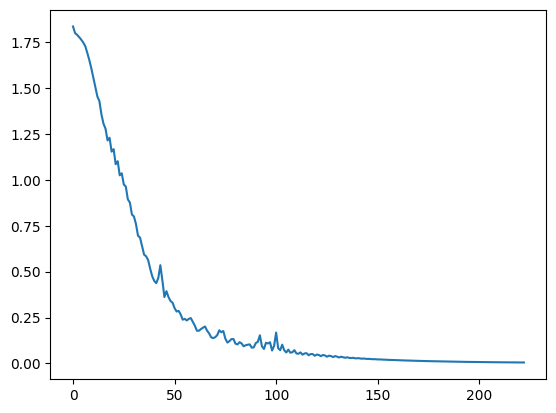

In [12]:
loss_values = clf.loss_curve_

plt.plot(loss_values)
plt.show()

Show Confusion Matrix
***

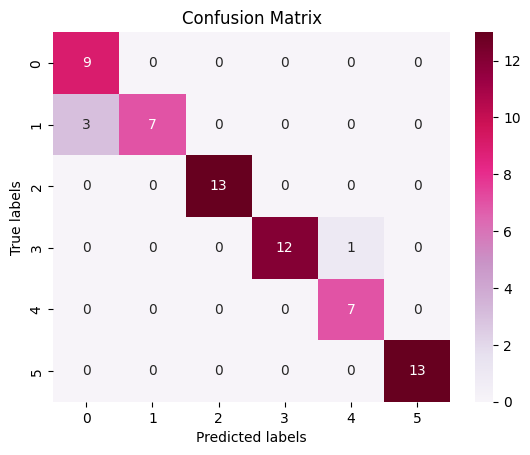

In [13]:
Y_predict = clf.predict(X_test_normalized)

cm = confusion_matrix(Y_test, Y_predict)
ax= plt.subplot()
sns.heatmap(cm, cmap='PuRd', annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

Show Model Evaluation score
***

In [14]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.70      0.82        10
           2       1.00      1.00      1.00        13
           3       1.00      0.92      0.96        13
           4       0.88      1.00      0.93         7
           5       1.00      1.00      1.00        13

    accuracy                           0.94        65
   macro avg       0.94      0.94      0.93        65
weighted avg       0.95      0.94      0.94        65

